In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 전처리


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [4]:
fcst = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_fcst_data.csv')
obs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_obs_data.csv')
energy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/energy.csv')
ilsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_ilsa.csv')
mise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_mise.csv')
rain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_rain.csv')
#mise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/mise_imputed.csv')
#mise10_Jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/dangjin_mise_jan.csv')


In [ ]:
filled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/RF_cloud.csv')


In [ ]:
filled.isnull().sum()

Temperature      0
WindSpeed        0
Humidity         0
Rain            23
solar            0
sunTime          0
Cloud          302
so2              0
ozone            0
no2              0
PM2.5            0
PM10             0
dtype: int64

In [ ]:
#import pandas as pd
#import glob
##/content/dustDetailInfo (1).xls
#path = r'/content/drive/MyDrive/test/' # use your path
#all_files = glob.glob(path + "/*.xls")

#li = []

#for filename in all_files:
#    df = pd.read_excel(filename, index_col=None, header=0).iloc[[14],:]
#    li.append(df)
    
#frame = pd.concat(li, axis=0, ignore_index=True)
#frame

In [ ]:
mise.columns

Index(['Unnamed: 0', '날짜', '아황산가스', '일산화탄소', '오존', '이산화질소', 'PM10', 'PM2.5',
       '시도', '측정소명', '측정소코드'],
      dtype='object')

In [ ]:
#info 확인
print(obs.info())
print(ilsa.info())
print(mise.info())
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         25626 non-null  int64  
 1   지점명        25626 non-null  object 
 2   일시         25626 non-null  object 
 3   기온(°C)     25589 non-null  float64
 4   풍속(m/s)    25590 non-null  float64
 5   풍향(16방위)   25590 non-null  float64
 6   습도(%)      25591 non-null  float64
 7   전운량(10분위)  21656 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13980 entries, 0 to 13979
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         13980 non-null  int64  
 1   지점명        13980 non-null  object 
 2   일시         13980 non-null  object 
 3   일조(hr)     13979 non-null  float64
 4   일사(MJ/m2)  13979 non-null  float64
dtypes: float64(2), int64(1), object(

In [ ]:
#mise.rename(columns={'Time':'일시','so2':'이황산가스','co':'일산화탄소','ozone':'오존','no2':'이산화질소'})

In [ ]:
##미세먼지 데이터#
#mise = mise.loc[:, ['날짜','아황산가스','일산화탄소','오존','이산화질소','PM10','PM2.5']]
#mise=mise.sort_values(by = '날짜')
#mise=mise.rename(columns={'날짜':'일시'})
#'아황산가스':'so2','일산화탄소':'co','오존':'ozone','이산화질소':'no2'

In [ ]:
#mise=mise.reset_index(drop=True)

In [ ]:
#미세먼지 
mise_new = mise.loc[:,['날짜','아황산가스','일산화탄소','오존','이산화질소','PM10','PM2.5']]

In [ ]:
mise_new = mise_new.rename(columns={'날짜':'Time'})
mise_new

,Time,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2018-03-01-00:00:00,0.002,0.4,0.029,0.010,10.0,7.0
1,2018-03-01 01:00:00,0.002,0.4,0.029,0.011,9.0,4.0
2,2018-03-01 02:00:00,0.003,0.4,0.027,0.013,1.0,NaN
3,2018-03-01 03:00:00,0.002,0.4,0.025,0.011,1.0,NaN
4,2018-03-01 04:00:00,0.002,0.5,0.028,0.009,1.0,NaN
...,...,...,...,...,...,...,...
24884,2020-12-31 20:00:00,0.004,0.6,0.009,0.029,39.0,16.0
24885,2020-12-31 21:00:00,0.004,0.6,0.011,0.026,43.0,24.0
24886,2020-12-31 22:00:00,0.004,0.6,0.012,0.023,36.0,20.0
24887,2020-12-31 23:00:00,0.004,0.6,0.013,0.022,38.0,19.0


In [ ]:
#강수량
rain.head()
rain.rename(columns={'날짜':'일시','강수량(mm)':'Rain'},inplace = True)

#na->0으로 채워주기
rain.Rain[rain['Rain'].isnull()] =0
rain.isnull().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


일시      0
지점      0
Rain    0
dtype: int64

In [ ]:
#1차보간
rain['일시']=pd.to_datetime(rain['일시'])
rain=rain.set_index('일시').resample('H').interpolate(method="linear", order=2)
rain

,지점,Rain
일시,,
2018-03-01 00:00:00,129.0,1.800
2018-03-01 01:00:00,129.0,1.725
2018-03-01 02:00:00,129.0,1.650
2018-03-01 03:00:00,129.0,1.575
2018-03-01 04:00:00,129.0,1.500
...,...,...
2021-01-30 20:00:00,129.0,0.000
2021-01-30 21:00:00,129.0,0.000
2021-01-30 22:00:00,129.0,0.000


In [ ]:
#rain 0보다 큰 구간 조사
#pd.qcut(rain.Rain[rain['Rain']>0],q=4)

In [ ]:
#위의 구간으로 bins 설정
#bins = [-0.001, 0.099, 0.6, 3.35,12.175,140] #max 139.3
#bins = [-0.001, 0.001, 0.333, 1.9,7.15,140] #max 139.3
#labels = [0,1,2,3,4]
#rain['Rain'] = pd.cut(rain['Rain'], bins, labels=labels)


In [ ]:
#rain['Rain'].value_counts().to_frame()

In [ ]:
#강수량 일시 1시간 주기로 나눈 데이터 생성
#rain['일시'] = pd.to_datetime(rain['일시'])

In [ ]:
#rain_hr = pd.DataFrame()
#rain_hr['일시'] = pd.date_range(start = '2018-03-01 00:00:00', end='2021-01-31 23:00:00',freq ='H')

In [ ]:
#rain_hr = pd.merge(rain_hr, rain, how= 'outer',on='일시')

In [ ]:
#rain_hr=rain_hr['Rain'].interpolate(method = 'ffill')

In [ ]:
rain['지점'] = 129

In [ ]:
rain

,지점,Rain
일시,,
2018-03-01 00:00:00,129,1.800
2018-03-01 01:00:00,129,1.725
2018-03-01 02:00:00,129,1.650
2018-03-01 03:00:00,129,1.575
2018-03-01 04:00:00,129,1.500
...,...,...
2021-01-30 20:00:00,129,0.000
2021-01-30 21:00:00,129,0.000
2021-01-30 22:00:00,129,0.000


In [ ]:
#mise_new = mise.iloc[:,1:].sort_values(by='Time')
#mise = mise.rename(columns ={'pm2.5':'pm2.5'})

# 데이터 병합





In [ ]:
obs_fn = pd.merge(obs,ilsa, how = 'outer', on=['일시','지점','지점명'])

In [ ]:
obs_fn

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),일조(hr),일사(MJ/m2)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN


In [ ]:
obs.info() #일시         25626 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         25626 non-null  int64  
 1   지점명        25626 non-null  object 
 2   일시         25626 non-null  object 
 3   기온(°C)     25589 non-null  float64
 4   풍속(m/s)    25590 non-null  float64
 5   풍향(16방위)   25590 non-null  float64
 6   습도(%)      25591 non-null  float64
 7   전운량(10분위)  21656 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
obs_fn['일시'] = pd.to_datetime(obs_fn['일시'])

In [ ]:
obs_fn = pd.merge(obs_fn,rain, how = 'outer', on = ['일시','지점']).sort_values(by='일시')

In [ ]:
obs_fn.rename(columns={'일시':'Time'},inplace = True)

In [ ]:
#obs_fn.rename(columns = {'일시':'Time'}, inplace = True)

In [ ]:
obs_fn

,지점,지점명,Time,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),일조(hr),일사(MJ/m2),Rain
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN,1.800
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN,1.725
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN,1.650
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN,1.575
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN,1.500
...,...,...,...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN,NaN
25622,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN,NaN
25623,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN,NaN
25624,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN,NaN


In [ ]:
mise

,Unnamed: 0,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5,시도,측정소명,측정소코드
0,0,2018-03-01-00:00:00,0.002,0.4,0.029,0.010,10.0,7.0,NaN,NaN,NaN
1,0,2018-03-01 01:00:00,0.002,0.4,0.029,0.011,9.0,4.0,충남 당진시\n,당진시청사,534434.0
2,1,2018-03-01 02:00:00,0.003,0.4,0.027,0.013,1.0,NaN,충남 당진시\n,당진시청사,534434.0
3,2,2018-03-01 03:00:00,0.002,0.4,0.025,0.011,1.0,NaN,충남 당진시\n,당진시청사,534434.0
4,3,2018-03-01 04:00:00,0.002,0.5,0.028,0.009,1.0,NaN,충남 당진시\n,당진시청사,534434.0
...,...,...,...,...,...,...,...,...,...,...,...
24884,24883,2020-12-31 20:00:00,0.004,0.6,0.009,0.029,39.0,16.0,충남 당진시\n,당진시청사,534434.0
24885,24884,2020-12-31 21:00:00,0.004,0.6,0.011,0.026,43.0,24.0,충남 당진시\n,당진시청사,534434.0
24886,24885,2020-12-31 22:00:00,0.004,0.6,0.012,0.023,36.0,20.0,충남 당진시\n,당진시청사,534434.0
24887,24886,2020-12-31 23:00:00,0.004,0.6,0.013,0.022,38.0,19.0,충남 당진시\n,당진시청사,534434.0


In [ ]:
#mise.info()
mise_new['Time'] = pd.to_datetime(mise_new['Time'])

In [ ]:
obs_fn = pd.merge(obs_fn,mise_new,how='outer')
obs_fn

,지점,지점명,Time,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),일조(hr),일사(MJ/m2),Rain,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN,1.800,0.002,0.4,0.029,0.010,10.0,7.0
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN,1.725,0.002,0.4,0.029,0.011,9.0,4.0
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN,1.650,0.003,0.4,0.027,0.013,1.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN,1.575,0.002,0.4,0.025,0.011,1.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN,1.500,0.002,0.5,0.028,0.009,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
obs_fn.rename(columns = {'일시' : 'Date', '기온(°C)':'Temperature','풍속(m/s)':'WindSpeed',
                        '풍향(16방위)':'WindDirection','전운량(10분위)':'Cloud','습도(%)':'Humidity',
                        '일조(hr)':'sunTime','일사(MJ/m2)':'solar','아황산가스':'so2', '일산화탄소':'co',  '오존': 'ozone', '이산화질소':'no2'},
               inplace = True)
obs_fn

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN,1.800,0.002,0.4,0.029,0.010,10.0,7.0
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN,1.725,0.002,0.4,0.029,0.011,9.0,4.0
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN,1.650,0.003,0.4,0.027,0.013,1.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN,1.575,0.002,0.4,0.025,0.011,1.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN,1.500,0.002,0.5,0.028,0.009,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#obs_fn.columns

In [ ]:
#obs_fn.rename(columns = {'일시': 'Date','기온(°C)':'Temperature','풍속(m/s)':'windSpeed',
#                          '풍향(16방위)':'WindDirection','습도(%)':'Humidity','전운량(10분위)':'Cloud','일조(hr)':'sumTime','일사(MJ/m2)':'solar',
#                         '아황산가스':'so2','일산화탄소':'co','오존':'ozone','이산화질소':'no2'},
#               inplace = True)
#obs_fn

In [ ]:
#obs_fn.isnull().sum()

## 시간변수 생성

In [ ]:
#년,월,일,시간,시즌 변수 생성
obs_fn['year'] = obs_fn.Time.dt.strftime('%Y')
obs_fn['month'] = obs_fn.Time.dt.strftime('%m')
obs_fn['day'] = obs_fn.Time.dt.strftime('%d')
obs_fn['hour'] = obs_fn.Time.dt.strftime('%H')


In [ ]:
#obs_fn['season'] =((obs_fn['Date'].dt.month % 12)+3) //3
obs_fn

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN,1.800,0.002,0.4,0.029,0.010,10.0,7.0,2018,03,01,00
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN,1.725,0.002,0.4,0.029,0.011,9.0,4.0,2018,03,01,01
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN,1.650,0.003,0.4,0.027,0.013,1.0,NaN,2018,03,01,02
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN,1.575,0.002,0.4,0.025,0.011,1.0,NaN,2018,03,01,03
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN,1.500,0.002,0.5,0.028,0.009,1.0,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,19
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,20
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,21
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,22


In [ ]:
#obs_fn = obs_fn.drop(['co'],axis =1)

In [ ]:
#obs_fn.isnull().sum()

In [ ]:
obs_fn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             25632 non-null  int64         
 1   지점명            25626 non-null  object        
 2   Time           25632 non-null  datetime64[ns]
 3   Temperature    25589 non-null  float64       
 4   WindSpeed      25590 non-null  float64       
 5   WindDirection  25590 non-null  float64       
 6   Humidity       25591 non-null  float64       
 7   Cloud          21656 non-null  float64       
 8   sunTime        13979 non-null  float64       
 9   solar          13979 non-null  float64       
 10  Rain           25609 non-null  float64       
 11  so2            24439 non-null  float64       
 12  co             24453 non-null  float64       
 13  ozone          24342 non-null  float64       
 14  no2            24453 non-null  float64       
 15  PM10           2402

# 결측치 보간

In [ ]:
obs_fn['solar'] = obs_fn['solar'].fillna(0)
obs_fn['sunTime'] = obs_fn['sunTime'].fillna(0)

In [ ]:
obs_fn['Temperature'].interpolate(method ='polynomial',order =2, inplace =True)
obs_fn['WindSpeed'].interpolate(method ='polynomial',order =2, inplace =True)
obs_fn['WindDirection'].interpolate(method ='polynomial',order =2, inplace =True)
obs_fn['Humidity'].interpolate(method ='polynomial',order =2, inplace =True)


#obs_fn['so2'].interpolate(method ='polynomial',order =2, inplace =True)
#obs_fn['ozone'].interpolate(method ='polynomial',order =2, inplace =True)
#obs_fn['no2'].interpolate(method ='polynomial',order =2, inplace =True)
#obs_fn['PM10'].interpolate(method ='polynomial',order =2, inplace =True)
#obs_fn['PM2.5'].interpolate(method ='polynomial',order =2, inplace =True)

#

In [ ]:
obs_fn.info()
#아황산가스 일산화탄소 오존 이산화질소 pm10 pm2.5
#.002   .4   .029   .01   10   7

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             25632 non-null  int64         
 1   지점명            25626 non-null  object        
 2   Time           25632 non-null  datetime64[ns]
 3   Temperature    25632 non-null  float64       
 4   WindSpeed      25632 non-null  float64       
 5   WindDirection  25632 non-null  float64       
 6   Humidity       25632 non-null  float64       
 7   Cloud          21656 non-null  float64       
 8   sunTime        25632 non-null  float64       
 9   solar          25632 non-null  float64       
 10  Rain           25609 non-null  float64       
 11  so2            24439 non-null  float64       
 12  co             24453 non-null  float64       
 13  ozone          24342 non-null  float64       
 14  no2            24453 non-null  float64       
 15  PM10           2402

In [ ]:
obs_fn.iloc[0,11:17] = [0.002,0.4,0.029,0.01,10,7]
obs_fn

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,0.0,0.0,1.800,0.002,0.4,0.029,0.010,10.0,7.0,2018,03,01,00
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,0.0,0.0,1.725,0.002,0.4,0.029,0.011,9.0,4.0,2018,03,01,01
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,0.0,0.0,1.650,0.003,0.4,0.027,0.013,1.0,NaN,2018,03,01,02
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,0.0,0.0,1.575,0.002,0.4,0.025,0.011,1.0,NaN,2018,03,01,03
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,0.0,0.0,1.500,0.002,0.5,0.028,0.009,1.0,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,19
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,20
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,21
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,22


In [ ]:
#temp= obs_fn.loc[:,['Temperature','WindSpeed','Humidity','Cloud','Rain','solar','sunTime','pm10','pm25','so2','no2','ozone']].iloc[:24887,:] #1,2월 빼기


In [ ]:
obs_fn.isnull().sum()

지점                  0
지점명                 6
Time                0
Temperature         0
WindSpeed           0
WindDirection       0
Humidity            0
Cloud            3976
sunTime             0
solar               0
Rain               23
so2              1193
co               1179
ozone            1290
no2              1179
PM10             1603
PM2.5            2276
year                0
month               0
day                 0
hour                0
dtype: int64

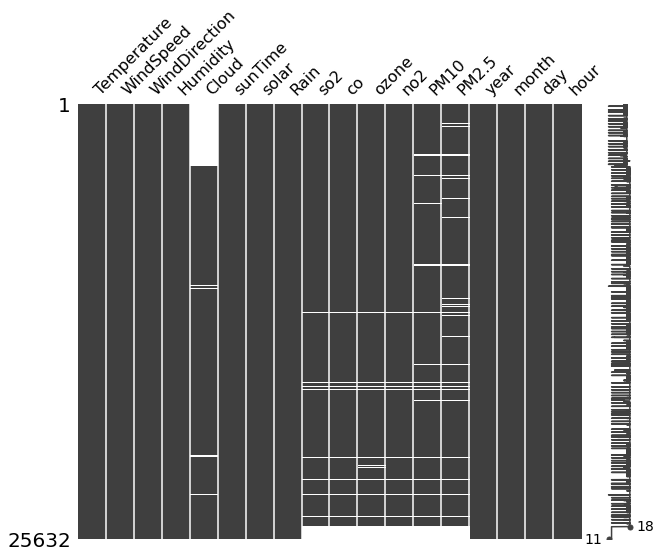

In [ ]:

msno.matrix(obs_fn.iloc[:,3:],figsize =(10,8))
plt.show()


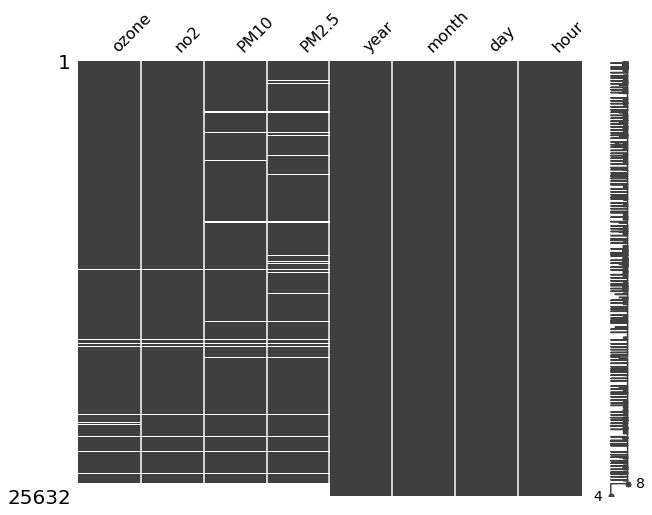

In [ ]:
msno.matrix(obs_fn.loc[:,'ozone':],figsize =(10,8))
plt.show()

In [ ]:
obs_fn

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,0.0,0.0,1.800,0.002,0.4,0.029,0.010,10.0,7.0,2018,03,01,00
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,0.0,0.0,1.725,0.002,0.4,0.029,0.011,9.0,4.0,2018,03,01,01
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,0.0,0.0,1.650,0.003,0.4,0.027,0.013,1.0,NaN,2018,03,01,02
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,0.0,0.0,1.575,0.002,0.4,0.025,0.011,1.0,NaN,2018,03,01,03
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,0.0,0.0,1.500,0.002,0.5,0.028,0.009,1.0,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,19
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,20
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,21
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,22


In [ ]:
#1월 미세먼지 데이터 추가
#-1월달 미세먼지, 초미세먼지 전처리
def mise_pm(file_name, pm):
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/'+f'{file_name}', sep='\t', header=None)
  df_values=df.values
  #type(df_values)
  datalist=[]
  datalist.append(df_values) #리스트로 변경
  df_array=np.array(datalist)
  df2=df_array.reshape(1,744)

  df3=pd.DataFrame(df2.T)
  df3['Time']=pd.date_range(start='2021-01-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
  df3=df3.rename(columns={0:f'{pm}'})
  return df3


dangjin_mise_pm25=mise_pm('dangjin_pm25.txt','PM2.5')
dangjin_mise_pm10=mise_pm('dangjin_pm10.txt','PM10')

#PM2.5, PM10 합치고 2월1일 0시 삭제, time을 인덱스로 
def mise_only(x,y):
  mise_add=pd.merge(x,y,on='Time')
  mise_add=mise_add.iloc[:-1,:]
  mise_add=mise_add.set_index(mise_add['Time'])
  return mise_add

dangjin_mise_jan=mise_only(dangjin_mise_pm25, dangjin_mise_pm10)

#1월 데이터 합치기
#data는 시계열 형식의 time열을 가지고 있어야함.
def add_jan(data,add):
  data=data.set_index(data['Time'])
  data.fillna(add, inplace=True)
  return data

obs_fn = add_jan(obs_fn,dangjin_mise_jan)




In [ ]:
obs_fn

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
Time,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,129,서산,2018-03-01 00:00:00,3.1,3.6,340,96,NaN,0,0,1.8,0.002,0.4,0.029,0.01,10,7,2018,03,01,00
2018-03-01 01:00:00,129,서산,2018-03-01 01:00:00,2.8,0.7,140,97,NaN,0,0,1.725,0.002,0.4,0.029,0.011,9,4,2018,03,01,01
2018-03-01 02:00:00,129,서산,2018-03-01 02:00:00,2.6,3.2,320,95,NaN,0,0,1.65,0.003,0.4,0.027,0.013,1,NaN,2018,03,01,02
2018-03-01 03:00:00,129,서산,2018-03-01 03:00:00,2,1.9,230,97,NaN,0,0,1.575,0.002,0.4,0.025,0.011,1,NaN,2018,03,01,03
2018-03-01 04:00:00,129,서산,2018-03-01 04:00:00,2.2,2.1,180,97,NaN,0,0,1.5,0.002,0.5,0.028,0.009,1,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,129,서산,2021-01-31 19:00:00,6.7,1.5,200,75,8,0,0,NaN,NaN,NaN,NaN,NaN,68,17,2021,01,31,19
2021-01-31 20:00:00,129,서산,2021-01-31 20:00:00,6.2,0.8,200,77,8,0,0,NaN,NaN,NaN,NaN,NaN,62,21,2021,01,31,20
2021-01-31 21:00:00,129,서산,2021-01-31 21:00:00,5.3,0.7,230,82,8,0,0,NaN,NaN,NaN,NaN,NaN,59,30,2021,01,31,21


In [ ]:
obs_fn['PM2.5'].replace("-", np.nan, inplace = True)
obs_fn['PM10'].replace("-", np.nan, inplace = True)

In [ ]:
obs_fn.iloc[:,4:]=obs_fn.iloc[:,4:].astype(float)

In [ ]:
temp = obs_fn.iloc[:,3:].astype(float)

In [ ]:
obs_fn = pd.concat([obs_fn['Time'],temp],axis = 1)

In [ ]:
obs_fn.reset_index(drop=True,inplace=True)

In [ ]:
#obs_fn.iloc[24888:,15] = dangjin_mise_pm10['pm10']

In [ ]:
#df_cloud = temp.dropna(axis=0).reset_index(drop=True)

In [ ]:
#df_nacloud = temp.iloc[:25630,:][temp['Cloud'].isna()]

In [ ]:
#df_nacloud.info()

In [ ]:
#obs_fn = obs_fn.drop(['sunTime'],axis =1)

In [ ]:
#obs_fn = pd.concat([obs_fn['Time'],obs_fn_new],axis=1)

In [ ]:
obs_fn

,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
0,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,0.0,0.0,1.800,0.002,0.4,0.029,0.010,10.0,7.0,2018.0,3.0,1.0,0.0
1,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,0.0,0.0,1.725,0.002,0.4,0.029,0.011,9.0,4.0,2018.0,3.0,1.0,1.0
2,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,0.0,0.0,1.650,0.003,0.4,0.027,0.013,1.0,NaN,2018.0,3.0,1.0,2.0
3,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,0.0,0.0,1.575,0.002,0.4,0.025,0.011,1.0,NaN,2018.0,3.0,1.0,3.0
4,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,0.0,0.0,1.500,0.002,0.5,0.028,0.009,1.0,NaN,2018.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,68.0,17.0,2021.0,1.0,31.0,19.0
25628,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,62.0,21.0,2021.0,1.0,31.0,20.0
25629,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,59.0,30.0,2021.0,1.0,31.0,21.0
25630,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,43.0,21.0,2021.0,1.0,31.0,22.0



## KNN 대기질

In [ ]:
!pip install impyute
from impyute.imputation.cs import fast_knn

In [ ]:
from impyute.imputation.cs import fast_knn
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from impyute.imputation.cs import fast_knn
from sklearn.impute import KNNImputer

np_imputed = fast_knn(obs_fn[['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']].values, k=30, normalize="std")  # knn 학습

In [ ]:
df_imputed = pd.DataFrame(np_imputed)
df_imputed
#pd.merge([dangjin.iloc[:,1:6], df_imputed.iloc[:,4:9]])
temp = pd.concat([obs_fn['Time'], df_imputed], axis=1)
#df_cloud=pd.concat([temp,air],axis=1)
df_imputed

,0,1,2,3,4,5,6,7,8,9
0,3.1,3.6,340.0,96.0,0.002000,0.029000,0.010000,7.000000,10.0,5.411584
1,2.8,0.7,140.0,97.0,0.002000,0.029000,0.011000,4.000000,9.0,5.944015
2,2.6,3.2,320.0,95.0,0.003000,0.027000,0.013000,15.811447,1.0,7.241287
3,2.0,1.9,230.0,97.0,0.002000,0.025000,0.011000,17.694185,1.0,6.812752
4,2.2,2.1,180.0,97.0,0.002000,0.028000,0.009000,17.857982,1.0,7.751321
...,...,...,...,...,...,...,...,...,...,...
25627,6.7,1.5,200.0,75.0,0.003790,0.046111,0.011477,17.000000,68.0,8.000000
25628,6.2,0.8,200.0,77.0,0.003733,0.044642,0.012555,21.000000,62.0,8.000000
25629,5.3,0.7,230.0,82.0,0.003712,0.039716,0.013545,30.000000,59.0,8.000000
25630,5.8,1.0,200.0,77.0,0.004203,0.038298,0.011256,21.000000,43.0,8.000000


In [ ]:
df_imputed=df_imputed.rename(columns={0:'Temperature',1:'WindSpeed',2:'WindDirection',3:'Humidity',4:'so2',5:'ozone',6:'no2',7:'PM2.5',8:'PM10',9:'Cloud'})

In [ ]:
df_imputed

,Temperature,WindSpeed,WindDirection,Humidity,so2,ozone,no2,PM2.5,PM10,Cloud
0,3.1,3.6,340.0,96.0,0.002000,0.029000,0.010000,7.000000,10.0,5.411584
1,2.8,0.7,140.0,97.0,0.002000,0.029000,0.011000,4.000000,9.0,5.944015
2,2.6,3.2,320.0,95.0,0.003000,0.027000,0.013000,15.811447,1.0,7.241287
3,2.0,1.9,230.0,97.0,0.002000,0.025000,0.011000,17.694185,1.0,6.812752
4,2.2,2.1,180.0,97.0,0.002000,0.028000,0.009000,17.857982,1.0,7.751321
...,...,...,...,...,...,...,...,...,...,...
25627,6.7,1.5,200.0,75.0,0.003790,0.046111,0.011477,17.000000,68.0,8.000000
25628,6.2,0.8,200.0,77.0,0.003733,0.044642,0.012555,21.000000,62.0,8.000000
25629,5.3,0.7,230.0,82.0,0.003712,0.039716,0.013545,30.000000,59.0,8.000000
25630,5.8,1.0,200.0,77.0,0.004203,0.038298,0.011256,21.000000,43.0,8.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


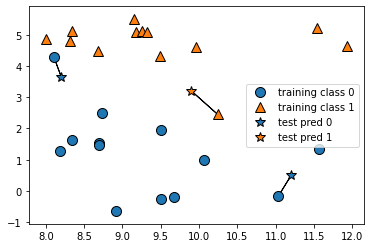

In [ ]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


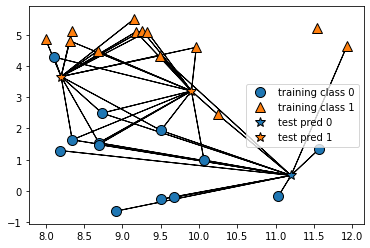

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=15)


In [ ]:
from sklearn.model_selection import train_test_split
 
x = df_imputed[df_imputed.columns.difference(['Cloud'])] 
y = df_imputed['Cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype('float32')

x_train = x_train.astype('float32').round(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


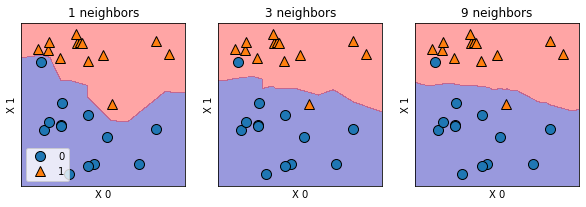

In [ ]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

fig, axes = plt.subplots(1,3,figsize= (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax )
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("X 0")
    ax.set_ylabel("X 1")
    
axes[0].legend(loc=3)

In [ ]:
air = df_imputed.iloc[:,4:] #'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud'
air=air.rename(columns={4:'so2',5:'ozone',6:'no2',7:	'PM2.5',8:	'PM10',9: 'Cloud'})
air

,so2,ozone,no2,PM2.5,PM10,Cloud
0,0.002000,0.029000,0.010000,7.000000,10.0,5.411584
1,0.002000,0.029000,0.011000,4.000000,9.0,5.944015
2,0.003000,0.027000,0.013000,15.811447,1.0,7.241287
3,0.002000,0.025000,0.011000,17.694185,1.0,6.812752
4,0.002000,0.028000,0.009000,17.857982,1.0,7.751321
...,...,...,...,...,...,...
25627,0.003790,0.046111,0.011477,17.000000,68.0,8.000000
25628,0.003733,0.044642,0.012555,21.000000,62.0,8.000000
25629,0.003712,0.039716,0.013545,30.000000,59.0,8.000000
25630,0.004203,0.038298,0.011256,21.000000,43.0,8.000000


In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1261a3f4425b460588ffe9badee72c15775f77e5b5df9e0159e743401cbc02ec
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
obs_imputed = air
obs_imputed = pd.concat([obs_imputed,obs_fn['Time']],axis=1)

In [ ]:
scale = StandardScaler().fit(obs_fn[['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']])
obs_scaled = scale.transform(obs_fn[['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']])


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(obs_fn[['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']])

In [ ]:
imputer = KNNImputer(n_neighbors= 15)
filled = imputer.fit_transform(scaled)

In [ ]:
obs_fn.columns

Index(['Time', 'Temperature', 'WindSpeed', 'WindDirection', 'Humidity',
       'Cloud', 'sunTime', 'solar', 'Rain', 'so2', 'co', 'ozone', 'no2',
       'PM10', 'PM2.5', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
temp= obs_fn.loc[:,['Temperature','WindSpeed','Humidity','Rain','solar','sunTime','Cloud']]#,'Cloud'
#['Temperature','WindSpeed','Humidity','Cloud','Rain','solar','sunTime','month','day','year']
print(len(temp))

air = obs_imputed.iloc[:,0:5] 

print(len(air))
print(temp.isna().sum())
print("="*100)
print(air.isna().sum())

df_cloud=pd.concat([temp,air],axis=1).dropna(axis=0).reset_index(drop=True) #위 관측치랑 합치기

#df_cloud=temp.dropna(axis=0).reset_index(drop=True)
#'so2','ozone','no2','PM10','PM2.5','solar','sunTime','month','co','year','hour'] 'WindDirection 
#df_cloud=temp.dropna(axis=0).reset_index(drop=True)
#df_cloud.info()
df_cloud

25632
25632
Temperature       0
WindSpeed         0
Humidity          0
Rain             23
solar             0
sunTime           0
Cloud          3976
dtype: int64
so2      0
ozone    0
no2      0
PM2.5    0
PM10     0
dtype: int64


,Temperature,WindSpeed,Humidity,Rain,solar,sunTime,Cloud,so2,ozone,no2,PM2.5,PM10
0,30.3,1.9,71.0,0.0,2.68,0.9,4.0,0.004000,0.027000,0.009000,23.0,39.0
1,30.4,2.5,65.0,0.0,3.83,1.0,5.0,0.005000,0.046000,0.009000,25.0,40.0
2,26.9,2.4,75.0,0.0,0.00,0.0,2.0,0.004000,0.051000,0.006000,21.0,24.0
3,26.3,1.1,80.0,0.0,0.00,0.0,1.0,0.002000,0.045000,0.005000,16.0,31.0
4,26.2,1.2,85.0,0.0,0.00,0.0,0.0,0.002000,0.040000,0.004000,19.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21628,-0.3,0.8,82.0,0.0,0.00,0.0,0.0,0.003318,0.015465,0.025615,41.0,85.0
21629,-1.6,0.0,84.0,0.0,0.00,0.0,0.0,0.003961,0.026356,0.019436,45.0,177.0
21630,-2.0,0.1,86.0,0.0,0.00,0.0,0.0,0.004118,0.026718,0.020602,45.0,140.0
21631,-2.4,0.9,88.0,0.0,0.00,0.0,1.0,0.003057,0.014438,0.023250,46.0,83.0


In [ ]:
#air_qt = obs_imputed.iloc[:,9:]
#air_qt = air_qt.drop(['co'],axis =1)
#df_cloud = pd.concat([temp,air_qt],axis=1).dropna(axis=0).reset_index(drop=True)

In [ ]:
#구름 na행 
df = pd.concat([temp,air],axis= 1)

df_cloud_na = df[df['Cloud'].isnull()]
df_cloud_na


,Temperature,WindSpeed,Humidity,Rain,solar,sunTime,Cloud,so2,ozone,no2,PM2.5,PM10
0,3.1,3.6,96.0,1.800000,0.00,0.0,NaN,0.002,0.029,0.010,7.000000,10.0
1,2.8,0.7,97.0,1.725000,0.00,0.0,NaN,0.002,0.029,0.011,4.000000,9.0
2,2.6,3.2,95.0,1.650000,0.00,0.0,NaN,0.003,0.027,0.013,15.811447,1.0
3,2.0,1.9,97.0,1.575000,0.00,0.0,NaN,0.002,0.025,0.011,17.694185,1.0
4,2.2,2.1,97.0,1.500000,0.00,0.0,NaN,0.002,0.028,0.009,17.857982,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23417,15.6,1.2,52.0,3.683333,0.35,0.5,NaN,0.004,0.057,0.007,7.000000,29.0
23757,7.9,0.6,89.0,0.000000,0.00,0.0,NaN,0.003,0.019,0.024,89.000000,108.0
23758,6.9,0.0,92.0,0.000000,0.00,0.0,NaN,0.003,0.008,0.030,101.000000,112.0
23924,8.6,0.1,77.0,2.750000,0.00,0.0,NaN,0.004,0.027,0.019,32.000000,34.0


In [ ]:
#날짜 열 더미화 제외
#더미화
#season_dummy = pd.get_dummies(obs_fn['season'])
#obs_fn = obs_fn.join(season_dummy.add_prefix('season_'))
#obs_fn

In [ ]:
temp

,Temperature,WindSpeed,Humidity,Rain,solar,sunTime,Cloud
0,3.1,3.6,96.0,1.800,0.0,0.0,NaN
1,2.8,0.7,97.0,1.725,0.0,0.0,NaN
2,2.6,3.2,95.0,1.650,0.0,0.0,NaN
3,2.0,1.9,97.0,1.575,0.0,0.0,NaN
4,2.2,2.1,97.0,1.500,0.0,0.0,NaN
...,...,...,...,...,...,...,...
25627,6.7,1.5,75.0,NaN,0.0,0.0,8.0
25628,6.2,0.8,77.0,NaN,0.0,0.0,8.0
25629,5.3,0.7,82.0,NaN,0.0,0.0,8.0
25630,5.8,1.0,77.0,NaN,0.0,0.0,8.0


In [ ]:
#df_cloud_na = temp.iloc[:25630,:][temp['Cloud'].isna()]

!pip install mglearn

In [ ]:
from sklearn.model_selection import train_test_split
 
x = temp[temp.columns.difference(['Cloud'])] 
y = temp['Cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype('float32')

x_train = x_train.astype('float32').round(3)

In [ ]:
import seaborn as sns

In [ ]:

# scatterplot matrix by pandas scatter_matrix()

from pandas.plotting import scatter_matrix

scatter_matrix(df_imputed, 

               alpha=0.5, 

               figsize=(40, 30), 

               marker = 'o',

               diagonal='kde')

plt.show()





Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_imputed

,0,1,2,3,4,5,6,7,8,9
0,3.1,3.6,340.0,96.0,0.002000,0.029000,0.010000,7.000000,10.0,5.411584
1,2.8,0.7,140.0,97.0,0.002000,0.029000,0.011000,4.000000,9.0,5.944015
2,2.6,3.2,320.0,95.0,0.003000,0.027000,0.013000,15.811447,1.0,7.241287
3,2.0,1.9,230.0,97.0,0.002000,0.025000,0.011000,17.694185,1.0,6.812752
4,2.2,2.1,180.0,97.0,0.002000,0.028000,0.009000,17.857982,1.0,7.751321
...,...,...,...,...,...,...,...,...,...,...
25627,6.7,1.5,200.0,75.0,0.003790,0.046111,0.011477,17.000000,68.0,8.000000
25628,6.2,0.8,200.0,77.0,0.003733,0.044642,0.012555,21.000000,62.0,8.000000
25629,5.3,0.7,230.0,82.0,0.003712,0.039716,0.013545,30.000000,59.0,8.000000
25630,5.8,1.0,200.0,77.0,0.004203,0.038298,0.011256,21.000000,43.0,8.000000


In [ ]:
df_imputed.columns

RangeIndex(start=0, stop=10, step=1)

In [ ]:
#obs_fn.isnull().sum()

# Random Forest

In [ ]:
#obs_fn=obs_fn.interpolate(method="ffill")

In [ ]:
from sklearn.model_selection import train_test_split
 
x = df_cloud[df_cloud.columns.difference(['Cloud'])] 
y = df_cloud['Cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype('float32')

x_train = x_train.astype('float32').round(3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


In [ ]:
#obs_fn_nona= obs_fn.dropna(axis = 0)

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=16,  min_samples_leaf= 2, min_samples_split= 2)


In [ ]:
model = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print(y_pred)
print(y_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred)) 
print(mean_squared_error(y_test, y_pred))

print("훈련 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

model1 = RandomForestClassifier(n_estimators = 100, random_state=10,
                                max_depth=64, min_samples_leaf=1,
                                min_samples_split=2)

model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [ ]:
from sklearn.model_selection import train_test_split

x = df_cloud[['Temperature', 'WindSpeed', 'WindDirection', 'Humidity',
       'sunTime', 'solar', 'Rain', 'month', 'day', 'year', 'so2',
       'ozone', 'no2', 'PM10', 'PM2.5']]
y= df_cloud[['Cloud']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,test_size= 0.3)


In [ ]:
#분류기
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

model1 = RandomForestClassifier(n_estimators = 100, random_state=10,
                                max_depth=64, min_samples_leaf=1,
                                min_samples_split=2)

model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)


In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
model1 = LinearRegression(normalize= True)
model1.fit(x_train, y_train)

In [ ]:
#2분23초
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [50,100],
           'max_depth' : [16,32,64],
           'min_samples_leaf' : [1,2,8],
           'min_samples_split' : [2,4]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터:  {'max_depth': 32, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
# 최고 예측 정확도: 0.4158

In [ ]:
classification_report(y_test,y_pred)

In [ ]:
print("특성 중요도 : \n{}".format(model1.feature_importances_))
feature_names = x_train.columns.tolist()

def plot_feature_importances(model):

    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)

    plt.yticks(np.arange(n_features),feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

plt.show()
plot_feature_importances(model1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, max_depth=32,random_state=2,max_features=4, min_samples_leaf= 2, min_samples_split= 4)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))
#'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100

In [ ]:
x_temp = df_cloud_na[df_cloud_na.columns.difference(['Cloud'])] #na인것만 다시 가져올것
y_predict = model2.predict(x_temp)


In [ ]:
print(mean_squared_error(y_test, y_pred))
y_df = pd.Series(y_predict)


In [ ]:
temp2 = pd.concat([temp,air],axis=1)

In [ ]:
temp2['Cloud'] = temp2['Cloud'].fillna(y_df)
#rain_new = pd.merge(rain_new, dangjin_rain, on='일시', how='outer')
temp2.to_csv('/content/drive/MyDrive/Colab Notebooks/동서발전 태양광 발전량 예측 AI 경진대회/data/RF_cloud_2.csv', index=False)

In [ ]:
temp2 = pd.concat([temp,air],axis=1)


In [ ]:
#RMSE = mean_squared_error(model1.predict(x_test), y_test)

In [ ]:
#RMSE  #11.325483413933918

In [ ]:
#model1.score(x_test,y_test)  #0.45292010933332416

In [ ]:
#y_predict = model1.predict(x_test)

In [ ]:
#온도+풍속+풍향+습도+강수량(1차보간+범주화)+co 뺀 대기질 정보 + 미세먼지+일조+일사+년월일시+시즌 = 정확도 0.44930
#온도+풍속+풍향+습도+강수량(1차보간+범주화)+co 뺀 대기질 정보(보간)+미세먼지+일조+일사+년월일시+시즌  = 0.452920

# Random Forest

In [ ]:
#from sklearn.model_selection import train_test_split 

#x = df_cloud[df_cloud.columns.difference(['Cloud'])]
#y = df_cloud['Cloud']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [ ]:
#######

In [ ]:
filled = pd.DataFrame(filled)
filled = filled.rename(columns = {0:'Temperature',1:'WindSpeed',2:'WindDirection',3:'Humidity',
                                  4:'so2',5:'ozone',6:'no2',7:'PM2.5',8:'PM10',9:'Cloud'})
#['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']

In [ ]:
filled

In [ ]:
filled.columns

In [ ]:
y = filled.loc[:,['Cloud']]
x = filled.loc[:,['Temperature', 'WindSpeed', 'WindDirection', 'Humidity', 'so2', 'ozone',
       'no2', 'PM2.5', 'PM10']]

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
#학습진행
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=10 ,max_depth=12, min_samples_leaf= 8, min_samples_split= 8)
model = forest.fit(x_train, y_train)

In [ ]:
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

In [ ]:
print(forest.score(x_test, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state =10, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=12,random_state=2,max_features=4, min_samples_leaf= 8, min_samples_split= 8)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# lightGBM

In [ ]:
!pip lightgbm

ERROR: unknown command "lightgbm"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset

x = df_cloud[['Temperature', 'WindSpeed', 'Humidity', 'Rain', 'solar', 'sunTime',
       'Cloud', 'so2', 'ozone', 'no2', 'PM2.5', 'PM10']]
y= df_cloud[['Cloud']]



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
# Feature Scaling

In [ ]:
train_ds = lgb.Dataset(x_train, label = y_train) 
test_ds = lgb.Dataset(x_test, label = y_test)

In [ ]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [ ]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.30234
[200]	valid_0's l2: 0.405594
[300]	valid_0's l2: 0.0863801
[400]	valid_0's l2: 0.0243744
[500]	valid_0's l2: 0.011121
[600]	valid_0's l2: 0.00696899
[700]	valid_0's l2: 0.00538994
[800]	valid_0's l2: 0.00465291
[900]	valid_0's l2: 0.00423544
[1000]	valid_0's l2: 0.00394958
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.00394958


In [ ]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [ ]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.003949580807342509
R2 score:  0.9997252518712146


In [ ]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [ ]:
final_result.columns = ['label','predict']


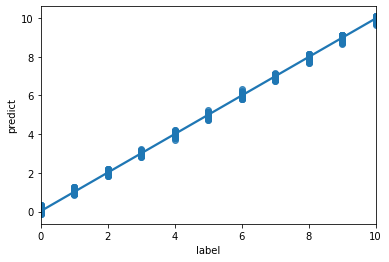

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [ ]:
ㅁㅁ

NameError: ignored